In [1]:
# Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("cropyield.csv")
print("Original dataset shape:", df.shape)

Original dataset shape: (36520, 12)


In [5]:
# df.to_excel("cropyield.xlsx")

In [6]:
# df = pd.read_excel("cropyield.xlsx")
# print("Original dataset shape:", df.shape)

In [7]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
print(df.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [8]:
df = df[df['Crop_Yield'] >= 0.20]
# df = df[df["Crop_Yield"] != 0]
df.shape

(25440, 12)

In [9]:
df

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
5,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
7,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667
...,...,...,...,...,...,...,...,...,...,...,...,...
36513,2023-12-31,Barley,Clay,6.25,11.617771,80.000000,14.700485,60.0,50.0,40.0,13.069169,43.750000
36515,2023-12-31,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,2023-12-31,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36518,2023-12-31,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [10]:
print(df.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [11]:
# Ensure 'Date' column exists and convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']) 

In [12]:
# Sort and set Date as index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [13]:
# # Drop categorical columns (not needed for time series)
# categorical_cols = ['Crop_Type', 'Soil_Type']
# df = df.drop(columns=categorical_cols, errors='ignore')
df = df.select_dtypes(include=['number'])
print("✅ After dropping categorical columns:", df.shape)


✅ After dropping categorical columns: (25440, 9)


In [14]:
# df = df[~df.index.duplicated(keep='first')]
# df.sort_index()

In [15]:
# categorical_cols = ['Crop_Type', 'Soil_Type']
# df = df.drop(columns=categorical_cols, errors='ignore')
# print("After dropping categorical columns:", df.shape)
# # df_numeric = df.select_dtypes(include=['number'])

In [16]:
# df = df.dropna(how = "all")

In [17]:
# Resample numeric columns (take mean per day)
df = df.resample('D').mean()

In [18]:
# df_daily = df_daily.dropna(how="all")

In [19]:
df.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792


In [20]:
df.tail()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250
2023-12-30,6.555556,15.174002,79.253593,8.844230,64.666667,51.944444,41.388889,26.585890,33.787037
2023-12-31,6.291667,14.639925,79.821944,9.925707,66.000000,53.250000,41.750000,27.374763,34.243056


In [21]:
# Interpolate missing days
df = df.interpolate(method='time')
print("✅ Resampled and interpolated dataset shape:", df.shape)

✅ Resampled and interpolated dataset shape: (3652, 9)


In [22]:
df.shape

(3652, 9)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [24]:
# df = pd.read_csv("timecleaned.csv")

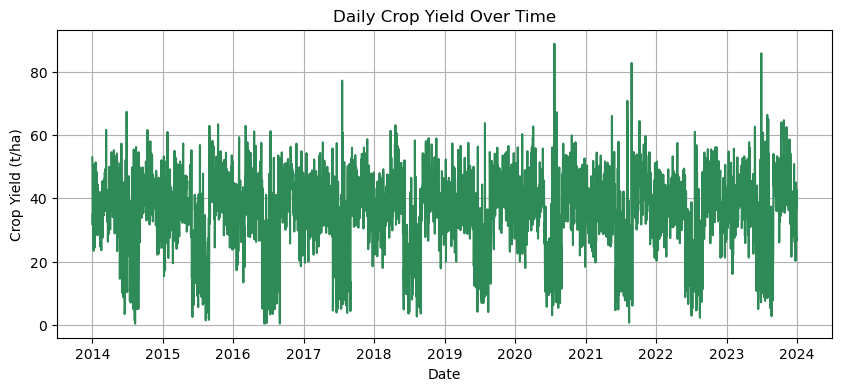

In [25]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Crop_Yield'], color='seagreen')
plt.title("Daily Crop Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Crop Yield (t/ha)")
plt.grid(True)
plt.show()

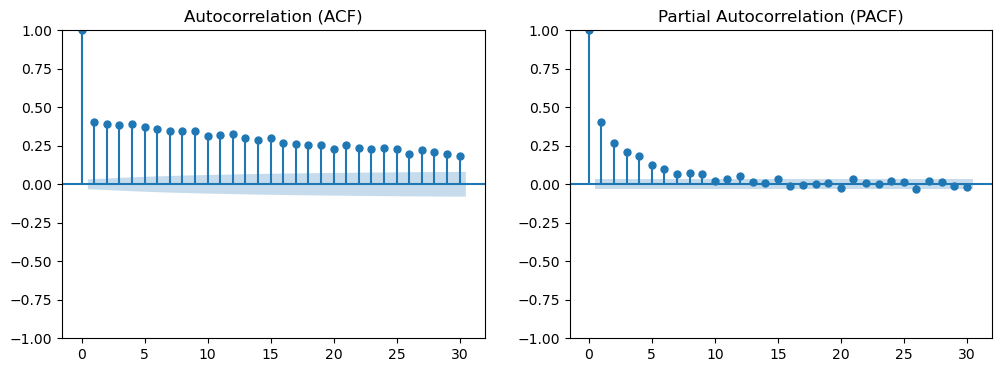

In [26]:
# Autocorrelation and Partial Autocorrelation
# ACF and PACF 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Crop_Yield'], lags=30,ax=axes[0])
plot_pacf(df['Crop_Yield'], lags=30, ax=axes[1])
axes[0].set_title('Autocorrelation (ACF)')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.show()

In [27]:
# ADF (Augmented Dickey-Fuller Test)
adf_result = adfuller(df['Crop_Yield'].dropna())
print("\n ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("Series is Stationary (Reject H₀: Non-Stationary)")
else:
    print("Series is Non-Stationary (Fail to Reject H₀)")
#Null Hypothesis (H₀) means The series is not stationary (it has a unit root)


 ADF Test Results:
ADF Statistic: -7.5979
p-value: 0.0000
Series is Stationary (Reject H₀: Non-Stationary)


In [28]:
# KPSS (Kwiatkowski–Phillips–Schmidt–Shin Test)
kpss_result = kpss(df['Crop_Yield'].dropna(), regression='c', nlags="auto")
print("\n KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")

if kpss_result[1] < 0.05:
    print(" Series is Non-Stationary (Reject H₀: Stationary)")
else:
    print(" Series is Stationary (Fail to Reject H₀)")



 KPSS Test Results:
KPSS Statistic: 0.0425
p-value: 0.1000
 Series is Stationary (Fail to Reject H₀)


C:\Users\abida\AppData\Local\Temp\ipykernel_20020\2096841267.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['Crop_Yield'].dropna(), regression='c', nlags="auto")


In [29]:
df

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...
2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250
